In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/completeData.csv').astype({'valence_tags': np.float32, 'arousal_tags':np.float32, 'dominance_tags':np.float32,'danceability':np.float32, 'energy':np.float32, 'key':np.float32, 'loudness':np.float32, 'mode':np.float32, 'speechiness':np.float32,
 'acousticness':np.float32, 'instrumentalness':np.float32, 'liveness':np.float32, 'valence':np.float32, 'tempo':np.float32})

In [ ]:
from ast import literal_eval
for x in range(len(df['seeds'])):
  df['seeds'][x] = literal_eval(df['seeds'][x])

<ipython-input-3-8b33d4aafe1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seeds'][x] = literal_eval(df['seeds'][x])


In [ ]:
print(np.unique(list(x[0] for x in df['seeds'])))

['acerbic' 'aggressive' 'airy' 'ambitious' 'amiable' 'angry'
 'angst-ridden' 'animated' 'anxious' 'apocalyptic' 'athletic'
 'atmospheric' 'austere' 'autumnal' 'bitter' 'bittersweet' 'bleak'
 'boisterous' 'bombastic' 'brash' 'brassy' 'bravado' 'bright' 'brittle'
 'brooding' 'calm' 'campy' 'capricious' 'carefree' 'cathartic'
 'celebratory' 'cerebral' 'cheerful' 'child-like' 'circular' 'clinical'
 'cold' 'comic' 'complex' 'confident' 'confrontational' 'consoling'
 'crunchy' 'cynical' 'dark' 'defiant' 'delicate' 'demonic' 'desperate'
 'detached' 'devotional' 'difficult' 'dignified' 'distraught' 'dramatic'
 'dreamy' 'driving' 'druggy' 'earnest' 'earthy' 'eccentric' 'ecstatic'
 'eerie' 'effervescent' 'elaborate' 'elegant' 'elegiac' 'energetic'
 'enigmatic' 'epic' 'erotic' 'ethereal' 'euphoric' 'exciting' 'exotic'
 'explosive' 'exuberant' 'feral' 'feverish' 'fierce' 'fiery' 'flashy'
 'flowing' 'fractured' 'freewheeling' 'fun' 'funereal' 'gentle' 'giddy'
 'gleeful' 'gloomy' 'good-natured' 'gra

# Data Exploration

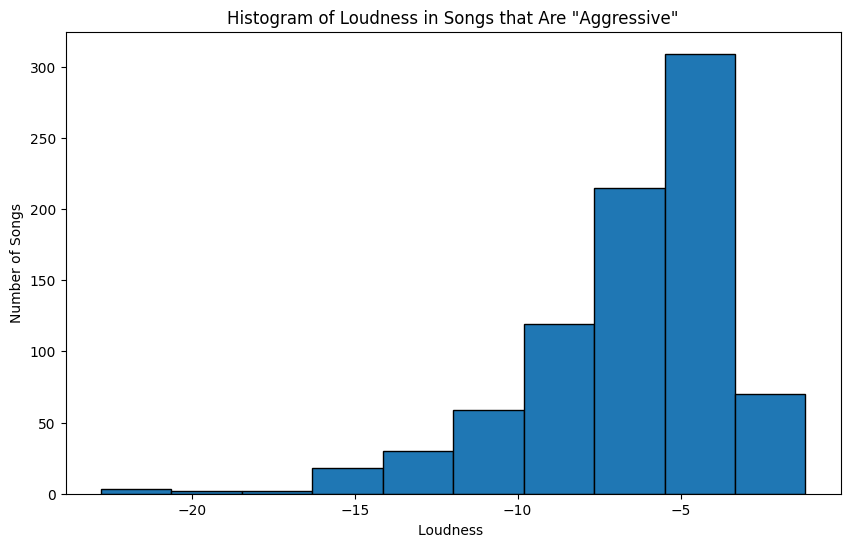

In [149]:
plt.figure(figsize=(10,6))
plt.hist(df[['aggressive' in x for x in df['seeds']]]['loudness'], edgecolor = 'black')
plt.xlabel('Loudness ')
plt.ylabel('Number of Songs')
plt.title('Histogram of Loudness in Songs That Are "Aggressive"')
plt.show()

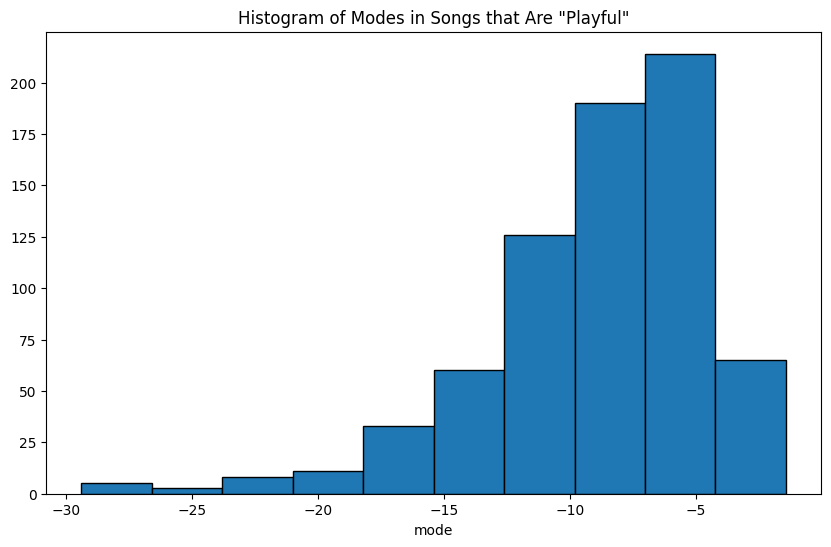

In [150]:
plt.figure(figsize=(10,6))
plt.hist(df[['playful' in x for x in df['seeds']]]['loudness'], edgecolor = 'black')
plt.xlabel('mode')
plt.title('Histogram of Modes in Songs That Are "Playful"')
plt.show()
#didn't process all the data up to playful

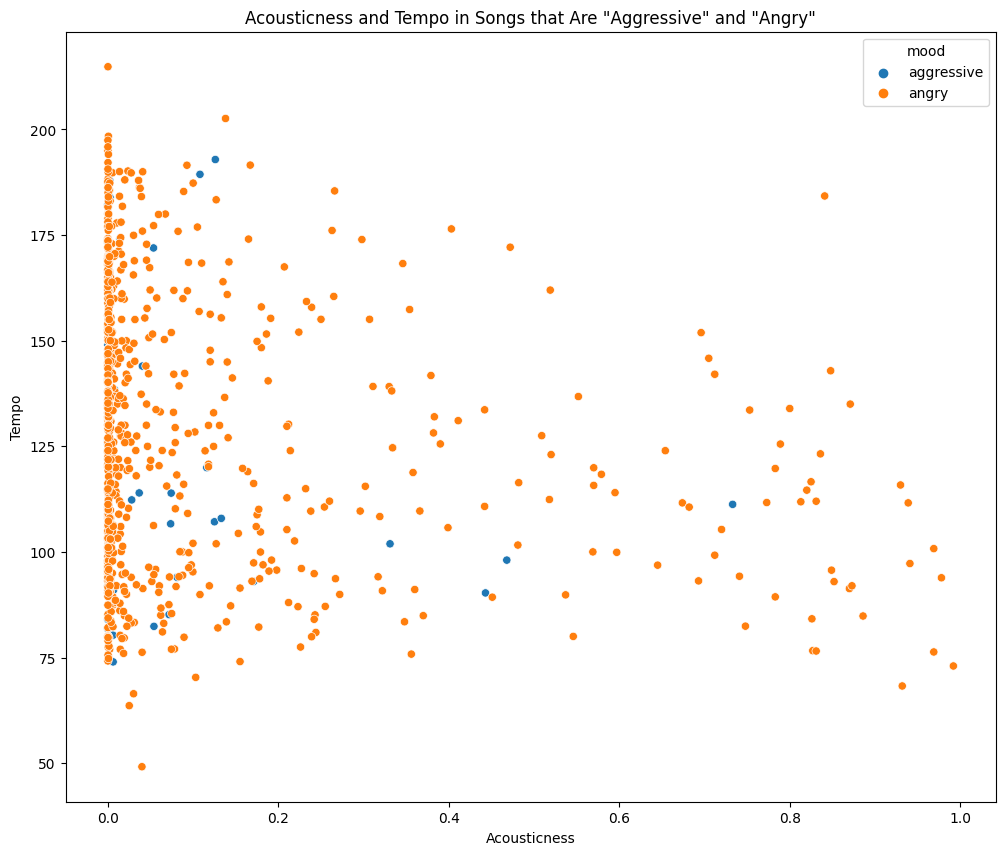

In [151]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df[[('agressive' in x or "angry" in x) for x in df['seeds']]].assign(mood=["aggressive" if x == True else "angry" for x in list("aggressive" in x for x in df[[('agressive' in x or "angry" in x) for x in df['seeds']]]["seeds"])]), x='acousticness', y='tempo',hue="mood")
plt.title('Acousticness and Tempo in Songs That Are "Aggressive" and "Angry"')
plt.xlabel("Acousticness")
plt.ylabel("Tempo")
plt.show()

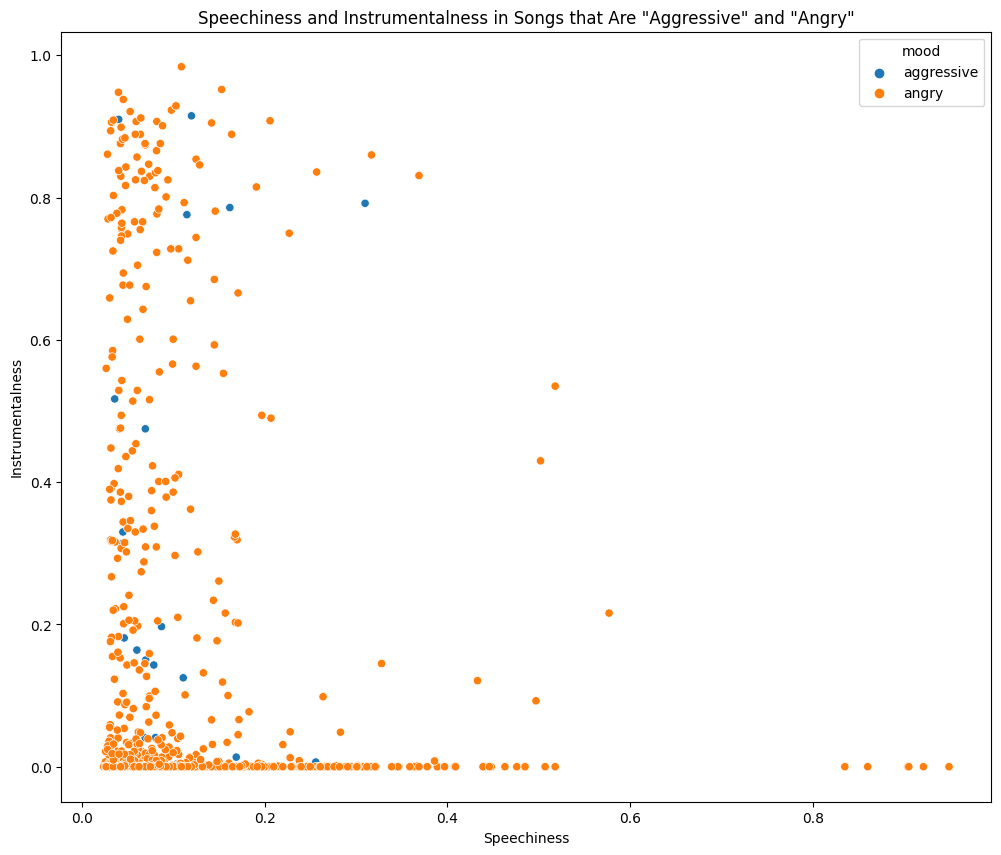

In [152]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df[[('agressive' in x or "angry" in x) for x in df['seeds']]].assign(mood=["aggressive" if x == True else "angry" for x in list("aggressive" in x for x in df[[('agressive' in x or "angry" in x) for x in df['seeds']]]["seeds"])]), x='speechiness', y='instrumentalness',hue="mood")
plt.title('Speechiness and Instrumentalness in Songs That Are "Aggressive" and "Angry"')
plt.xlabel("Speechiness")
plt.ylabel("Instrumentalness")
plt.show()

the two graphs above have few aggressive colored points, because most aggressive songs also are angry (many songs' seeds have both angry and aggressive)

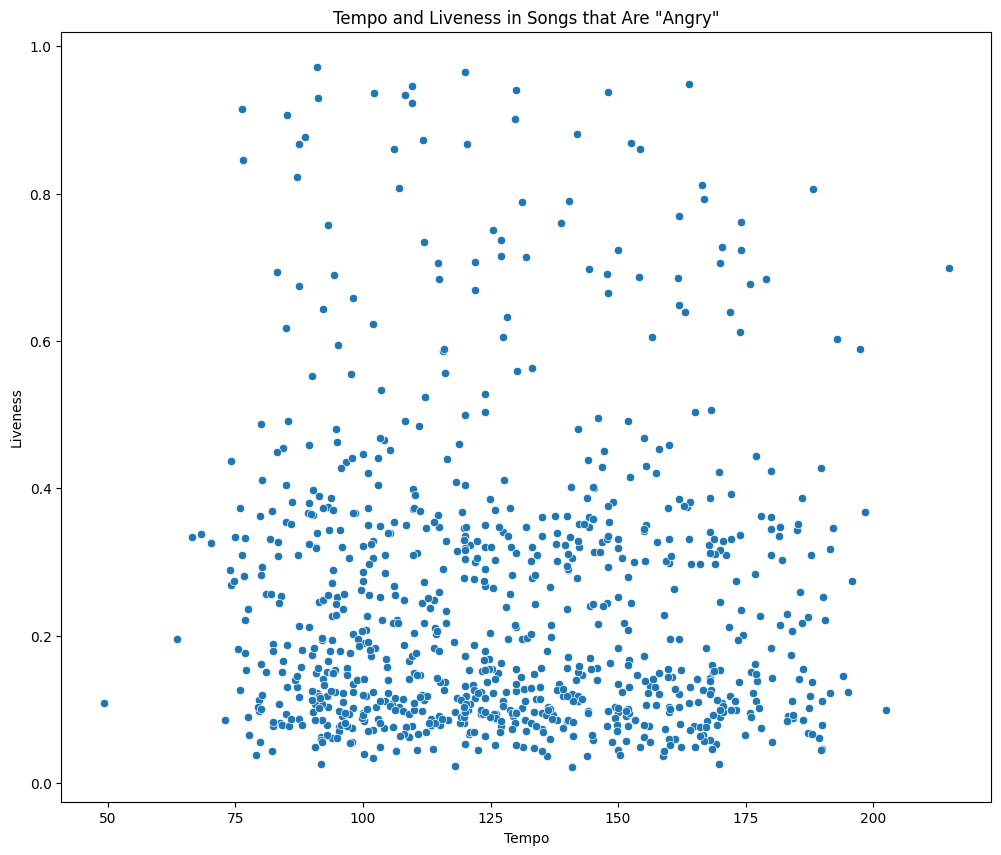

In [153]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df[['angry' in x for x in df['seeds']]]['tempo'], y=df[['angry' in x for x in df['seeds']]]['liveness'])
plt.title('Tempo and Liveness in Songs That Are "Angry"')
plt.xlabel("Tempo")
plt.ylabel("Liveness")
plt.show()

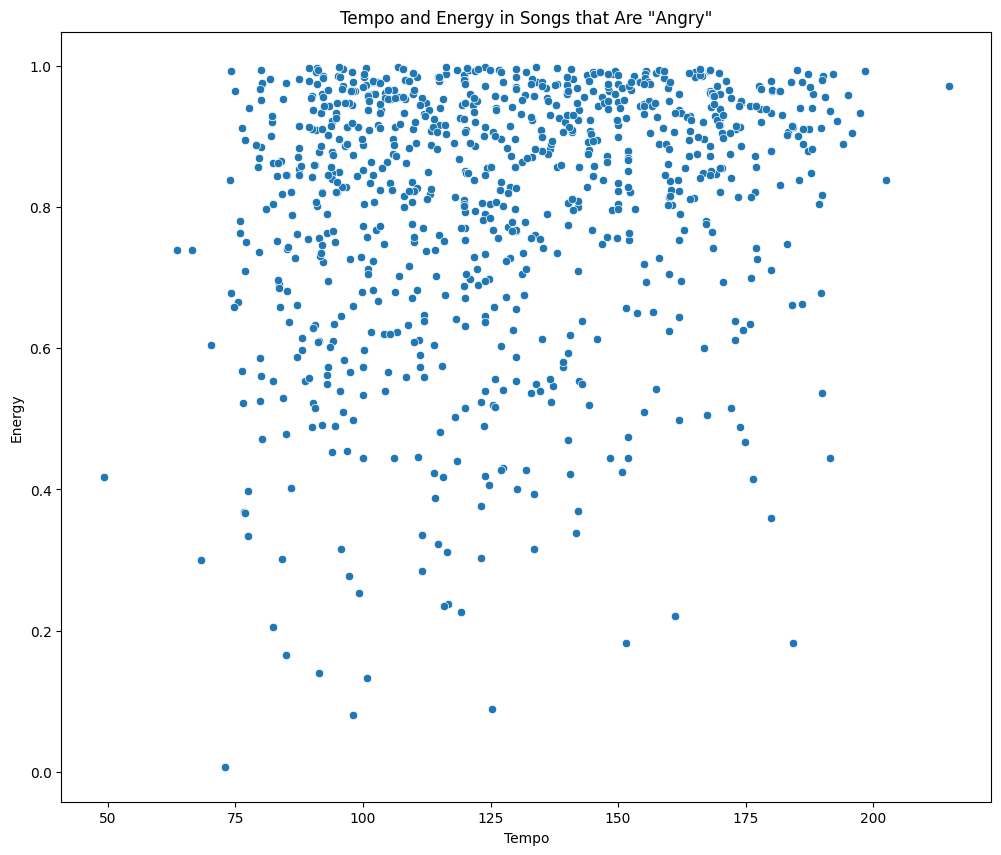

In [154]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df[['angry' in x for x in df['seeds']]]['tempo'], y=df[['angry' in x for x in df['seeds']]]['energy'])
plt.title('Tempo and Energy in Songs That Are "Angry"')
plt.xlabel("Tempo")
plt.ylabel("Energy")
plt.show()

interesting, it's like a flip of against liveness, but i'm not sure what that really means

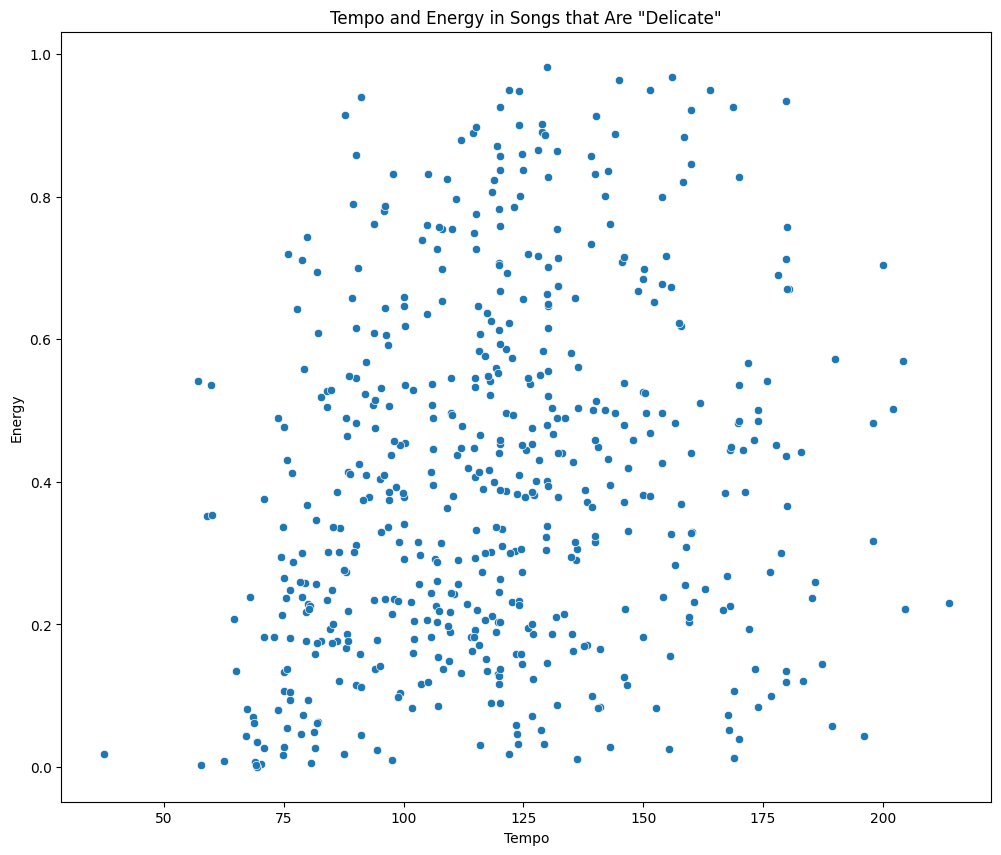

In [155]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df[['delicate' in x for x in df['seeds']]]['tempo'], y=df[['delicate' in x for x in df['seeds']]]['energy'])
plt.title('Tempo and Energy in Songs That Are "Delicate"')
plt.xlabel("Tempo")
plt.ylabel("Energy")
plt.show()

notice the diff between delicate vs angry - angry has a lot more high energy levels compared to delicate which is much more scattered

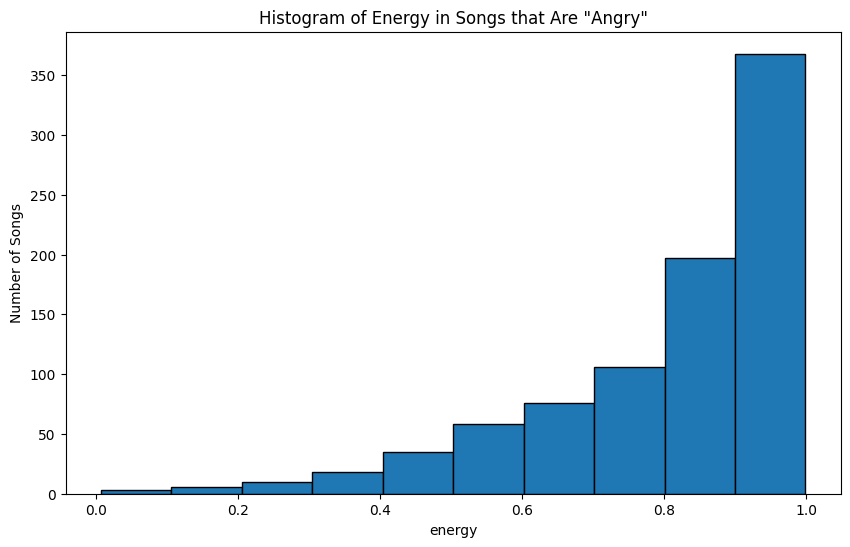

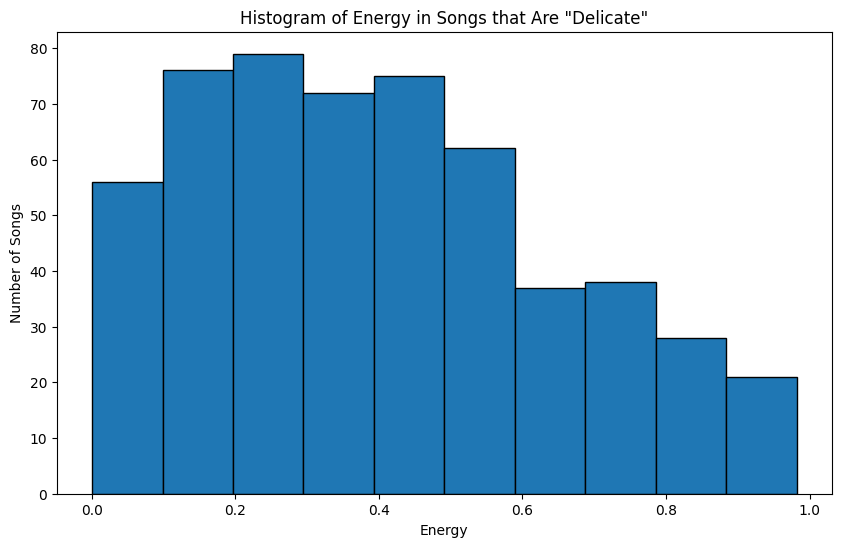

In [156]:
plt.figure(figsize=(10,6))
plt.hist(df[['angry' in x for x in df['seeds']]]['energy'], edgecolor = 'black')
plt.ylabel('Number of Songs')
plt.xlabel('energy')
plt.title('Histogram of Energy in Songs That Are "Angry"')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(df[['delicate' in x for x in df['seeds']]]['energy'], edgecolor = 'black')
plt.ylabel('Number of Songs')
plt.title('Histogram of Energy in Songs That Are "Delicate"')
plt.xlabel('Energy')
plt.show()

a lot more varied for delicate!!

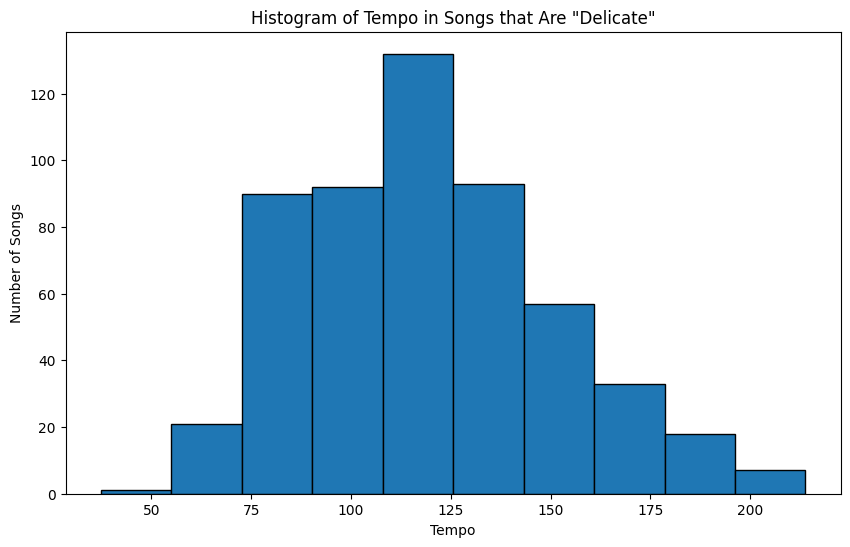

In [157]:
plt.figure(figsize=(10,6))
plt.hist(df[['delicate' in x for x in df['seeds']]]['tempo'], edgecolor = 'black')
plt.ylabel('Number of Songs')
plt.title('Histogram of Tempo in Songs That Are "Delicate"')
plt.xlabel('Tempo')
plt.show()

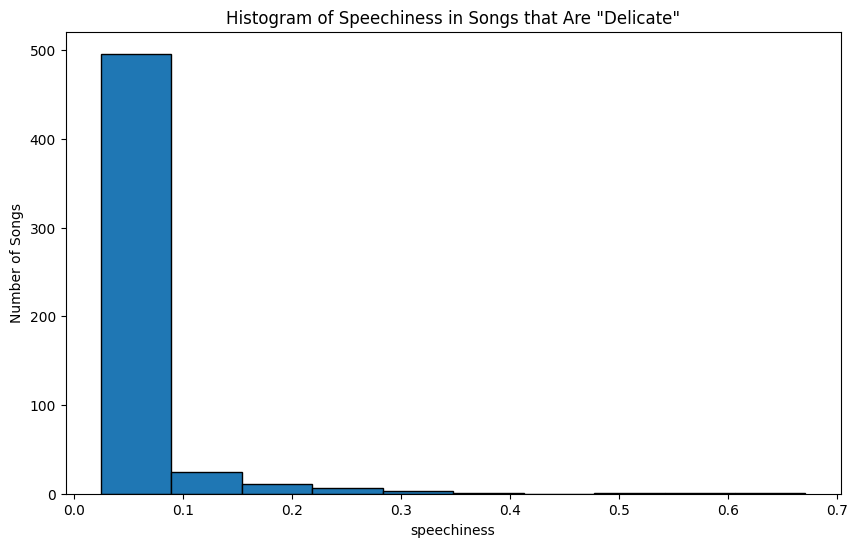

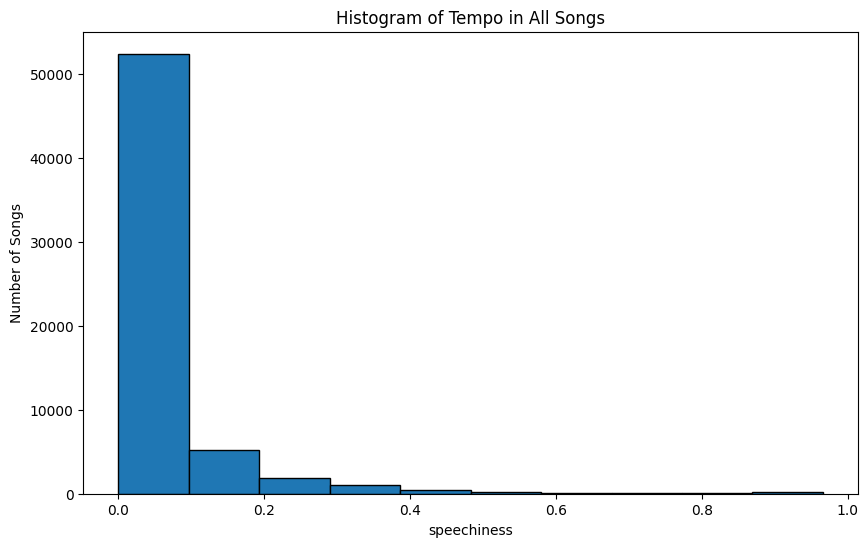

In [158]:
plt.figure(figsize=(10,6))
plt.hist(df[['delicate' in x for x in df['seeds']]]['speechiness'], edgecolor = 'black')
plt.ylabel('Number of Songs')
plt.title('Histogram of Speechiness in Songs That Are "Delicate"')
plt.xlabel('speechiness')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(df['speechiness'], edgecolor = 'black')
plt.ylabel('Number of Songs')
plt.title('Histogram of Tempo in All Songs')
plt.xlabel('speechiness')
plt.show()

pretty clear that speechiness is pretty low for delicate music

but it seems like speechiness in general seems to lie pretty low

Text(0.5, 0, 'Energy')

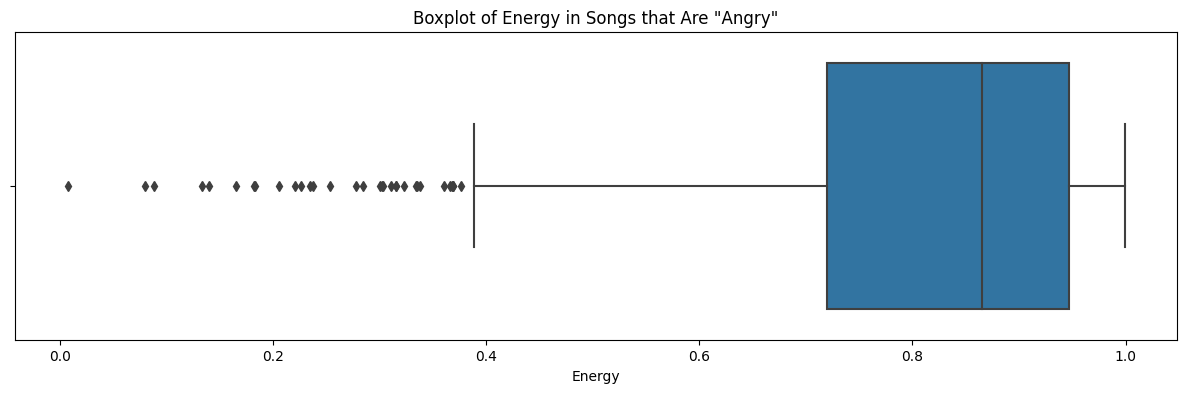

In [159]:
plt.figure(figsize=(15,4))
sns.boxplot(x=df[['angry' in x for x in df['seeds']]]['energy'])
plt.title('Boxplot of Energy in Songs That Are "Angry"')
plt.xlabel('Energy')

tendency to be higher energy

Text(0.5, 0, 'Energy')

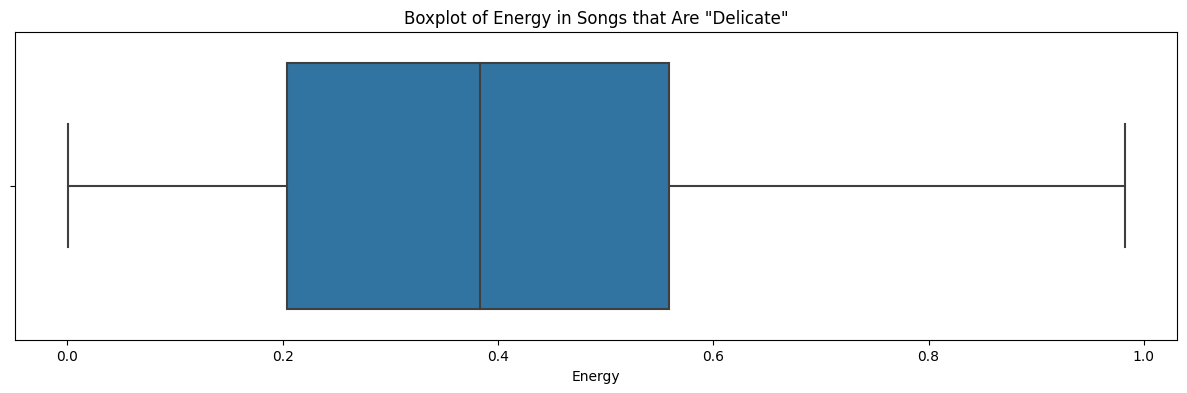

In [160]:
plt.figure(figsize=(15,4))
sns.boxplot(x=df[['delicate' in x for x in df['seeds']]]['energy'])
plt.title('Boxplot of Energy in Songs That Are "Delicate"')
plt.xlabel('Energy')

pretty evenly spread - energy doesn't seem to have too great a correlation on delicate music

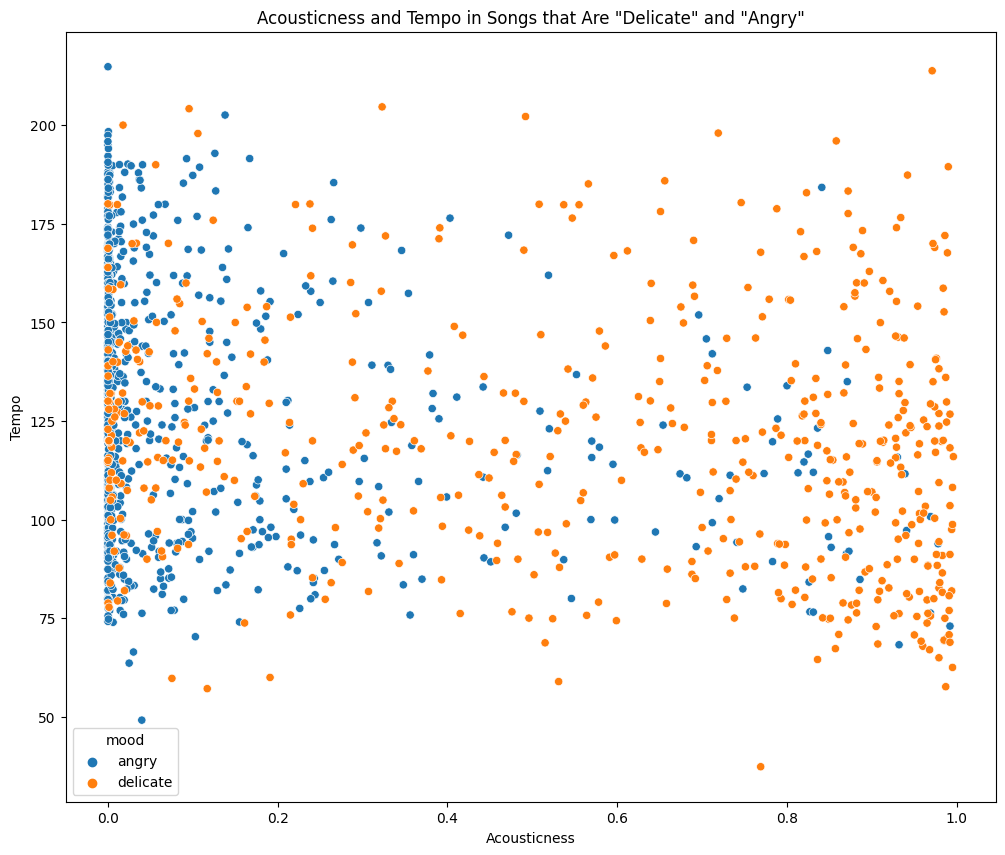

In [161]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df[[('delicate' in x or "angry" in x) for x in df['seeds']]].assign(mood=["delicate" if x == False else "angry" for x in list("angry" in x for x in df[[('delicate' in x or "angry" in x) for x in df['seeds']]]["seeds"])]), x='acousticness', y='tempo',hue="mood")
plt.title('Acousticness and Tempo in Songs That Are "Delicate" and "Angry"')
plt.xlabel("Acousticness")
plt.ylabel("Tempo")
plt.show()